In [1]:
import os 
import pandas as pd
import numpy as np

from src.utils.dict_loader import TopicDictionary
from src.utils.output_loader import load_all_topvecs, load_all_bstr_arrs, load_all_sum_vectors
from src.utils.downstream_aggregate import normalize

import matplotlib.pyplot as plt
plt.rcParams.update({'pdf.fonttype': 42})
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

import yaml
with open("../../src/configs.yml", "r") as configs:
    configs = yaml.safe_load(configs)

ROOTPATH = configs["ROOTPATH"]

START2016 = pd.to_datetime(configs["START2016"])
END2016 = pd.to_datetime(configs["END2016"])
START2020 = pd.to_datetime(configs["START2020"])
END2020 = pd.to_datetime(configs["END2020"])

INPUT_FPATH = configs["SUM_WORDVEC_PATH"]
print(f"INPUT_FPATH=={INPUT_FPATH}")

OUTPUT_FPATH = ROOTPATH + "output/figs/"
if not os.path.exists(OUTPUT_FPATH): os.mkdir(OUTPUT_FPATH)
print(f"OUTPUT_FPATH=={OUTPUT_FPATH}")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yijingch/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yijingch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


INPUT_FPATH==/Users/yijingch/Documents/GITHUB/intermedia-agenda-setting/output/sum-wordvec-min2-gtm1/
OUTPUT_FPATH==/Users/yijingch/Documents/GITHUB/intermedia-agenda-setting/output/figs/


In [2]:
from src.utils.dict_configuration import dictionary2016, dictionary2020

Successfully loaded dictionary!
	# of unique topics: 27
	# of unique words: 1426
Successfully loaded dictionary!
	# of unique topics: 27
	# of unique words: 1453


In [3]:
sum_wordvecs2016 = load_all_sum_vectors(year=2016, sumvec_fpath=INPUT_FPATH, vector_type="wordvecs")
sum_wordvecs2020 = load_all_sum_vectors(year=2020, sumvec_fpath=INPUT_FPATH, vector_type="wordvecs")

bstr_sum_wordvecs2016 = load_all_sum_vectors(year=2016, sumvec_fpath=INPUT_FPATH, vector_type="wordvecs", load_bstr=True)
bstr_sum_wordvecs2020 = load_all_sum_vectors(year=2020, sumvec_fpath=INPUT_FPATH, vector_type="wordvecs", load_bstr=True)

In [4]:
# get rare words
N_TOP_WORDS = 500
TOP_WORDS1_2016 = np.argsort(-sum_wordvecs2016["headline"][0][0])[:N_TOP_WORDS]
TOP_WORDS2_2016 = np.argsort(-sum_wordvecs2016["headline"][1][0])[:N_TOP_WORDS]

TOP_WORDS1_2020 = np.argsort(-sum_wordvecs2020["headline"][0][0])[:N_TOP_WORDS]
TOP_WORDS2_2020 = np.argsort(-sum_wordvecs2020["headline"][1][0])[:N_TOP_WORDS]

WORDS2DROP_IDX1_2016 = list(set(range(dictionary2016.n_words)) - set(TOP_WORDS1_2016))
WORDS2DROP_IDX2_2016 = list(set(range(dictionary2016.n_words)) - set(TOP_WORDS2_2016))
WORDS2DROP_IDX1_2020 = list(set(range(dictionary2020.n_words)) - set(TOP_WORDS1_2020))
WORDS2DROP_IDX2_2020 = list(set(range(dictionary2020.n_words)) - set(TOP_WORDS2_2020))

print("2016")
print("# of words retained cand1:", len(TOP_WORDS1_2016))
print("# of words retained cand2:", len(TOP_WORDS2_2016))

print("# of words dropped cand1:", len(WORDS2DROP_IDX1_2016))
print("# of words dropped cand2:", len(WORDS2DROP_IDX2_2016))

print("2020")
print("# of words retained cand1:", len(TOP_WORDS1_2020))
print("# of words retained cand2:", len(TOP_WORDS2_2020))

print("# of words dropped cand1:", len(WORDS2DROP_IDX1_2020))
print("# of words dropped cand2:", len(WORDS2DROP_IDX2_2020))

2016
# of words retained cand1: 500
# of words retained cand2: 500
# of words dropped cand1: 926
# of words dropped cand2: 926
2020
# of words retained cand1: 500
# of words retained cand2: 500
# of words dropped cand1: 953
# of words dropped cand2: 953


In [5]:
COLORMAP = {
    "low-cred": "#E55807",
    "traditional": "#445069",
    "left": "#4A55A2",
    "right": "#B31312", 
    "DEM": "#4A55A2",
    "REP": "#B31312", 
}

In [6]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def normalize(arr, smooth=0):
    return (np.array(arr)+smooth)/np.sum(np.array(arr)+smooth)

def get_correlation(arr1, arr2, idx2drop=[], corr_func=pearsonr):
    if len(idx2drop) > 0:
        arr1_clean = np.delete(arr1, idx2drop)
        arr2_clean = np.delete(arr2, idx2drop)
    else:
        arr1_clean = arr1
        arr2_clean = arr2
    arr1_clean = normalize(arr1_clean)
    arr2_clean = normalize(arr2_clean)
    corr, p = corr_func(arr1_clean, arr2_clean)
    return corr, p

In [7]:
corr_func = pearsonr 
corr_cred_cand1_2016, _ = get_correlation(sum_wordvecs2016["headline"][0][1], sum_wordvecs2016["headline"][0][2], 
                                          idx2drop=WORDS2DROP_IDX1_2016, corr_func=corr_func)
corr_cred_cand2_2016, _ = get_correlation(sum_wordvecs2016["headline"][1][1], sum_wordvecs2016["headline"][1][2], 
                                          idx2drop=WORDS2DROP_IDX2_2016, corr_func=corr_func)
corr_ideo_cand1_2016, _ = get_correlation(sum_wordvecs2016["headline"][0][3], sum_wordvecs2016["headline"][0][5], 
                                          idx2drop=WORDS2DROP_IDX1_2016, corr_func=corr_func)
corr_ideo_cand2_2016, _ = get_correlation(sum_wordvecs2016["headline"][1][3], sum_wordvecs2016["headline"][1][5], 
                                          idx2drop=WORDS2DROP_IDX2_2016, corr_func=corr_func)

corr_cred_cand1_2020, _ = get_correlation(sum_wordvecs2020["headline"][0][1], sum_wordvecs2020["headline"][0][2], 
                                          idx2drop=WORDS2DROP_IDX1_2020, corr_func=corr_func)
corr_cred_cand2_2020, _ = get_correlation(sum_wordvecs2020["headline"][1][1], sum_wordvecs2020["headline"][1][2], 
                                          idx2drop=WORDS2DROP_IDX2_2020, corr_func=corr_func)
corr_ideo_cand1_2020, _ = get_correlation(sum_wordvecs2020["headline"][0][3], sum_wordvecs2020["headline"][0][5], 
                                          idx2drop=WORDS2DROP_IDX1_2020, corr_func=corr_func)
corr_ideo_cand2_2020, _ = get_correlation(sum_wordvecs2020["headline"][1][3], sum_wordvecs2020["headline"][1][5], 
                                          idx2drop=WORDS2DROP_IDX2_2020, corr_func=corr_func)

In [8]:
nruns = 200
corr_arr_cred1_2016 = np.zeros(nruns)
corr_arr_cred2_2016 = np.zeros(nruns)
corr_arr_ideo1_2016 = np.zeros(nruns)
corr_arr_ideo2_2016 = np.zeros(nruns)

corr_arr_cred1_2020 = np.zeros(nruns)
corr_arr_cred2_2020 = np.zeros(nruns)
corr_arr_ideo1_2020 = np.zeros(nruns)
corr_arr_ideo2_2020 = np.zeros(nruns)

for r in range(nruns):    
    corr_arr_cred1_2016[r], _ = get_correlation(bstr_sum_wordvecs2016["headline"][0][1][r], bstr_sum_wordvecs2016["headline"][0][2][r],
                                                idx2drop=WORDS2DROP_IDX1_2016, corr_func=corr_func)
    corr_arr_cred2_2016[r], _ = get_correlation(bstr_sum_wordvecs2016["headline"][1][1][r], bstr_sum_wordvecs2016["headline"][1][2][r],
                                                idx2drop=WORDS2DROP_IDX2_2016, corr_func=corr_func)
    corr_arr_ideo1_2016[r], _ = get_correlation(bstr_sum_wordvecs2016["headline"][0][3][r], bstr_sum_wordvecs2016["headline"][0][5][r],
                                                idx2drop=WORDS2DROP_IDX1_2016, corr_func=corr_func)
    corr_arr_ideo2_2016[r], _ = get_correlation(bstr_sum_wordvecs2016["headline"][1][3][r], bstr_sum_wordvecs2016["headline"][1][5][r],
                                                idx2drop=WORDS2DROP_IDX2_2016, corr_func=corr_func)
    
    corr_arr_cred1_2020[r], _ = get_correlation(bstr_sum_wordvecs2020["headline"][0][1][r], bstr_sum_wordvecs2020["headline"][0][2][r],
                                                idx2drop=WORDS2DROP_IDX1_2020, corr_func=corr_func)
    corr_arr_cred2_2020[r], _ = get_correlation(bstr_sum_wordvecs2020["headline"][1][1][r], bstr_sum_wordvecs2020["headline"][1][2][r],
                                                idx2drop=WORDS2DROP_IDX2_2020, corr_func=corr_func)
    corr_arr_ideo1_2020[r], _ = get_correlation(bstr_sum_wordvecs2020["headline"][0][3][r], bstr_sum_wordvecs2020["headline"][0][5][r],
                                                idx2drop=WORDS2DROP_IDX1_2020, corr_func=corr_func)
    corr_arr_ideo2_2020[r], _ = get_correlation(bstr_sum_wordvecs2020["headline"][1][3][r], bstr_sum_wordvecs2020["headline"][1][5][r],
                                                idx2drop=WORDS2DROP_IDX2_2020, corr_func=corr_func)
    
corr_bot_cred1_2016 = np.percentile(corr_arr_cred1_2016, q=5)
corr_bot_cred2_2016 = np.percentile(corr_arr_cred2_2016, q=5)
corr_bot_ideo1_2016 = np.percentile(corr_arr_ideo1_2016, q=5)
corr_bot_ideo2_2016 = np.percentile(corr_arr_ideo2_2016, q=5)

corr_bot_cred1_2020 = np.percentile(corr_arr_cred1_2020, q=5)
corr_bot_cred2_2020 = np.percentile(corr_arr_cred2_2020, q=5)
corr_bot_ideo1_2020 = np.percentile(corr_arr_ideo1_2020, q=5)
corr_bot_ideo2_2020 = np.percentile(corr_arr_ideo2_2020, q=5)

corr_top_cred1_2016 = np.percentile(corr_arr_cred1_2016, q=95)
corr_top_cred2_2016 = np.percentile(corr_arr_cred2_2016, q=95)
corr_top_ideo1_2016 = np.percentile(corr_arr_ideo1_2016, q=95)
corr_top_ideo2_2016 = np.percentile(corr_arr_ideo2_2016, q=95)

corr_top_cred1_2020 = np.percentile(corr_arr_cred1_2020, q=95)
corr_top_cred2_2020 = np.percentile(corr_arr_cred2_2020, q=95)
corr_top_ideo1_2020 = np.percentile(corr_arr_ideo1_2020, q=95)
corr_top_ideo2_2020 = np.percentile(corr_arr_ideo2_2020, q=95)

corr_avg_cred1_2016 = np.mean(corr_arr_cred1_2016)
corr_avg_cred2_2016 = np.mean(corr_arr_cred2_2016)
corr_avg_ideo1_2016 = np.mean(corr_arr_ideo1_2016)
corr_avg_ideo2_2016 = np.mean(corr_arr_ideo2_2016)

corr_avg_cred1_2020 = np.mean(corr_arr_cred1_2020)
corr_avg_cred2_2020 = np.mean(corr_arr_cred2_2020)
corr_avg_ideo1_2020 = np.mean(corr_arr_ideo1_2020)
corr_avg_ideo2_2020 = np.mean(corr_arr_ideo2_2020)

Text(0.5, 1.0, 'Keyword-level Alignment')

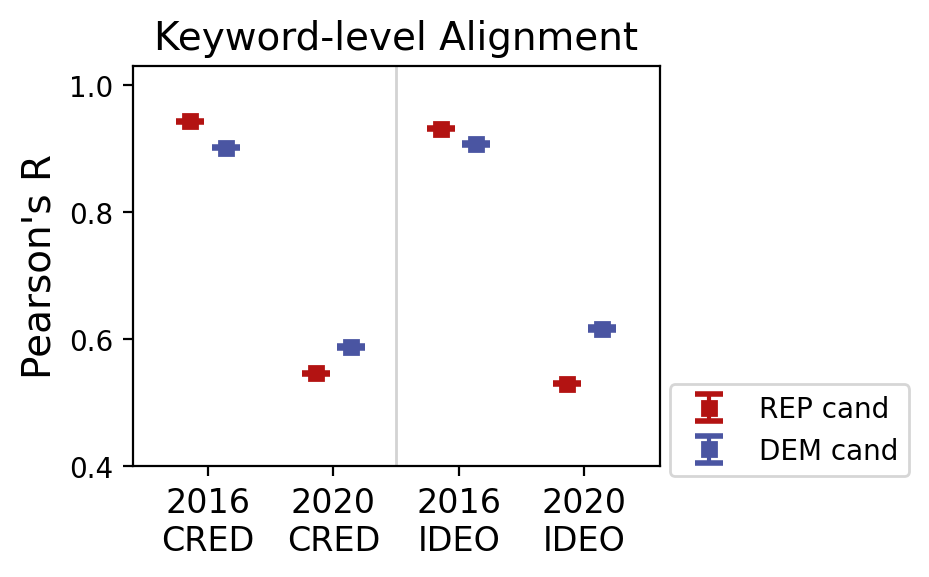

In [9]:
TICKS = ["2016\nCRED", "2020\nCRED", "2016\nIDEO", "2020\nIDEO"]

# y_rep_cand = np.array([corr_cred_cand1_2016, corr_cred_cand2_2020, corr_ideo_cand1_2016, corr_ideo_cand2_2020])
y_rep_cand = np.array([corr_avg_cred1_2016, corr_avg_cred2_2020, corr_avg_ideo1_2016, corr_avg_ideo2_2020])
y_rep_cand_top = np.array([corr_top_cred1_2016, corr_top_cred2_2020, corr_top_ideo1_2016, corr_top_ideo2_2020])
y_rep_cand_bot = np.array([corr_bot_cred1_2016, corr_bot_cred2_2020, corr_bot_ideo1_2016, corr_bot_ideo2_2020])

# y_dem_cand = np.array([corr_cred_cand2_2016, corr_cred_cand1_2020, corr_ideo_cand2_2016, corr_ideo_cand1_2020])
y_dem_cand = np.array([corr_avg_cred2_2016, corr_avg_cred1_2020, corr_avg_ideo2_2016, corr_avg_ideo1_2020])
y_dem_cand_top = np.array([corr_top_cred2_2016, corr_top_cred1_2020, corr_top_ideo2_2016, corr_top_ideo1_2020])
y_dem_cand_bot = np.array([corr_bot_cred2_2016, corr_bot_cred1_2020, corr_bot_ideo2_2016, corr_bot_ideo1_2020])

fig,ax = plt.subplots(figsize=(3.4,2.6))
diff = 0.14
# ax.scatter(range(4), y_rep_cand)
# ax.scatter(range(4), y_dem_cand)
ax.errorbar(
    x=np.arange(4)-diff, y=y_rep_cand, yerr=[y_rep_cand-y_rep_cand_bot, y_rep_cand_top-y_rep_cand], 
    color=COLORMAP["REP"], marker="s", markersize=5, linestyle="", lw=1.5, capsize=5, capthick=2, label="REP cand")
ax.errorbar(
    x=np.arange(4)+diff, y=y_dem_cand, yerr=[y_dem_cand-y_dem_cand_bot, y_dem_cand_top-y_dem_cand], 
    color=COLORMAP["DEM"], marker="s", markersize=5, linestyle="", lw=1.5, capsize=5, capthick=2, label="DEM cand")
ax.set_xticks(range(len(TICKS)), TICKS, fontsize=12)
ax.axvline(x=1.5, color="lightgrey", linewidth=1)
plt.legend(bbox_to_anchor=(1.5, .24))
plt.ylim(.4,1.03)
ax.set_yticks(ax.get_yticks()[::2])
plt.xlim(-.6, 3.6)
plt.ylabel("Pearson's R", fontsize=14)
plt.title("Keyword-level Alignment", fontsize=14)
# plt.savefig(OUTPUT_FPATH + "keyword_alignment.pdf", dpi=300, bbox_inches="tight")

In [10]:
y_rep_cand

array([0.9426897 , 0.54662548, 0.93154113, 0.53014394])

In [18]:
(0.54662548+0.53014394)/2

0.53838471

In [11]:
y_dem_cand

array([0.90161993, 0.58795718, 0.90676749, 0.61651088])

In [19]:
(0.58795718+0.61651088)/2

0.60223403

In [15]:
((y_rep_cand[1]-y_rep_cand[0])+(y_rep_cand[3]-y_rep_cand[2]))/2

-0.39873070792810855

In [17]:
((y_dem_cand[1]-y_dem_cand[0])+(y_dem_cand[3]-y_dem_cand[2]))/2

-0.30195967932628454

In [16]:
((0.54662548-0.9426897)+(0.53014394-0.93154113))/2

-0.398730705

In [12]:
(0.54651077+0.53005832)/2

0.538284545

In [13]:
(0.58792138+0.61653919)/2

0.6022302850000001

In [14]:
a = y_rep_cand[1]-y_rep_cand[0]
b = y_rep_cand[3]-y_rep_cand[2]
c = y_dem_cand[1]-y_dem_cand[0]
d = y_dem_cand[3]-y_dem_cand[2]
np.mean([a,b,c,d])

-0.35034519362719657